# Assignment 4: Logistic Regression
## Team: 3musketeers
### Student Names:

- Anu Sebastian - 012496276
- Ravali Nagabandi - 011530454
- Saloni Sharad Bhalerao - 012466623

### Github: https://github.com/anuksebastian/3musketeers

### Team Contribution:
- Analyzing Attribute data - Anu
- Data Preperation - Saloni
- Attempt to use Linear Regresion for Classification - Anu, Ravali and Saloni
  -  Predicting a Continuous Response
- Predicting a Categorical Response - Anu, Ravali and Saloni
- Use Logistic Regression instead - Anu, Ravali and Saloni
- Use Sigmoid function to classify - Ravali

### Business Objective:
To analyze the dataset for forest fires and to predict forest fires based on temperature and area values by using Logistic Regression.


In [1]:
# forestfire identification dataset
import pandas as pd
col_names = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','category']
fire = pd.read_csv('/Users/ravalinagabandi/Desktop/sjsu/Sem III/Machine Learning/Foresr Fires/forestfires_0918.csv')
fire.sort_values('temp', inplace=True)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
280,4,6,dec,fri,84.7,26.7,352.6,4.1,2.2,59,4.9,0.0,9.27,0
282,6,3,feb,sun,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,0.00,0
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,0
278,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03,1
277,3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,1


### Data Enrichment
We have added additional column named as “category” and we have populated this column by grouping area values into five categories. 


In [2]:
print(fire.head())

     X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain   area  \
280  4  6   dec  fri  84.7  26.7  352.6  4.1   2.2  59   4.9   0.0   9.27   
282  6  3   feb  sun  84.9  27.5  353.5  3.4   4.2  51   4.0   0.0   0.00   
279  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0   9.77   
278  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0  22.03   
277  3  4   dec  mon  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0  10.73   

     category  
280         0  
282         0  
279         0  
278         1  
277         1  


### Data Wrangling and Preparation
Studied the different dimensions in the dataset and visualized using scatterplot and Line of Best Fit. We have converted day and month data from strings to numeric values. As part of categorizing/classifying "area" we have used area_pred, category and category_pred. We are dividing the "area" into 5 categories and using Logistic Regression, we are predicting the probability of fire in a given area for 'X' value of temperature.

In [3]:
fires_attributes = fire.columns.values.tolist()
number_of_columns = len(fires_attributes)
# Data preperation - Convert month and day from string values to numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

fire['month'] = [months_table.index(month) for month in fire['month'] ]
fire['day'] =   [days_table.index(day)     for day   in fire['day']   ]

fire['X'] -= 1
fire['Y'] -= 2

fire.head()
# Excluding row headers
for idx in list(range(4, number_of_columns - 1)):  
    fire[fires_attributes[idx]] = fire[fires_attributes[idx]] - \
                                   fire[fires_attributes[idx]].mean()

In [5]:
print(fire)

     X  Y  month  day       FFMC        DMC          DC        ISI       temp  \
280  3  4     11    5  -5.944681  -84.17234 -195.340039  -4.921663 -16.689168   
282  5  1      1    0  -5.744681  -83.37234 -194.440039  -5.621663 -14.689168   
279  3  2     11    1  -5.244681  -85.47234 -198.240039  -6.421663 -14.289168   
278  3  2     11    1  -5.244681  -85.47234 -198.240039  -6.421663 -14.289168   
277  2  2     11    1  -5.244681  -85.47234 -198.240039  -6.421663 -14.289168   
276  3  2     11    1  -5.244681  -85.47234 -198.240039  -6.421663 -14.289168   
465  1  0      1    6 -11.144681 -107.27234 -532.640039  -7.221663 -14.289168   
463  5  3      1    2 -15.544681 -106.47234 -531.740039  -7.121663 -14.289168   
273  3  4     11    0  -6.244681  -83.67234 -194.440039  -2.221663 -14.089168   
211  6  2      7    6   2.855319   28.52766   46.259961  11.278337 -13.789168   
464  5  2      1    2 -15.544681 -106.47234 -531.740039  -7.121663 -13.789168   
274  7  4     11    3  -6.64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

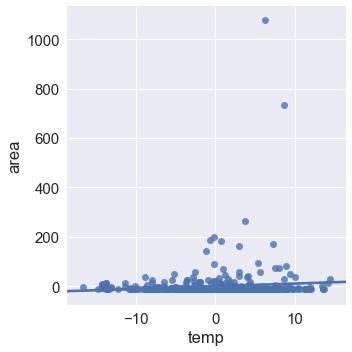

In [7]:
sns.lmplot(x='temp', y='area', data=fire, ci=None)

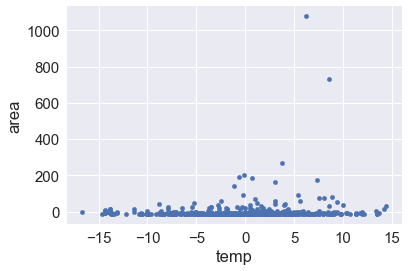

In [8]:
# scatter plot using Pandas
fire.plot(kind='scatter', x='temp', y='area')

Text(0,0.5,'area')

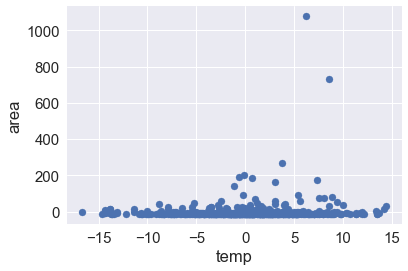

In [9]:
# equivalent scatter plot using Matplotlib
plt.scatter(fire.temp, fire.area)
plt.xlabel('temp')
plt.ylabel('area')

### Attempt to use Linear Regression for Classification

In [10]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['temp']
X = fire[feature_cols]
y=fire.area
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# make predictions for all values of X
fire['area_pred'] = linreg.predict(X)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category,area_pred
280,3,4,11,5,-5.944681,-84.17234,-195.340039,-4.921663,-16.689168,14.711799,0.882398,-0.021663,-3.577292,0,-17.901263
282,5,1,1,0,-5.744681,-83.37234,-194.440039,-5.621663,-14.689168,6.711799,-0.017602,-0.021663,-12.847292,0,-15.756008
279,3,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,-3.077292,0,-15.326957
278,3,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,9.182708,1,-15.326957
277,2,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,-2.117292,1,-15.326957


Text(0,0.5,'Predicted area')

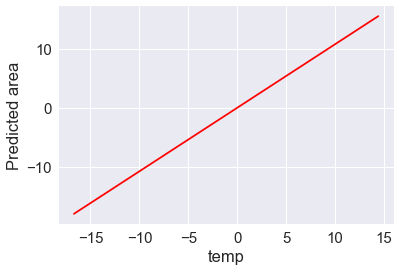

In [12]:
# plot those predictions connected by a line
plt.plot(fire.temp, fire.area_pred, color='red')
plt.xlabel('temp')
plt.ylabel('Predicted area')

Text(0,0.5,'area')

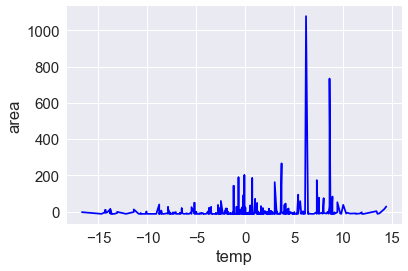

In [13]:
# plot those predictions connected by a line
plt.plot(fire.temp, fire.area, color='blue')
plt.xlabel('temp')
plt.ylabel('area')

### Line of Best Fit

Text(0,0.5,'area')

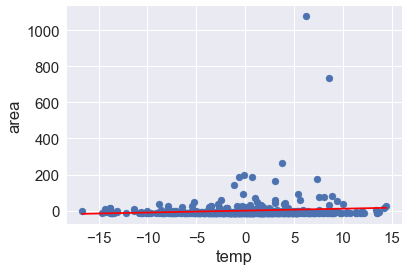

In [14]:
# put the plots together
plt.scatter(fire.temp, fire.area)
plt.plot(fire.temp, fire.area_pred, color='red')
plt.xlabel('temp')
plt.ylabel('area')

### Interpreting Linear Regression Coefficients

In [15]:
# compute prediction for temp=30 using the equation
linreg.intercept_ + linreg.coef_ *30

array([32.17882863])

In [16]:
# compute prediction for temp=30 using the predict method
linreg.predict(30)

array([32.17882863])

In [17]:
# examine coefficient for temp
zip(feature_cols, linreg.coef_)

In [18]:
linreg.predict(80)

array([85.81020968])

### Predicting Categorical Response

Text(0,0.5,'category')

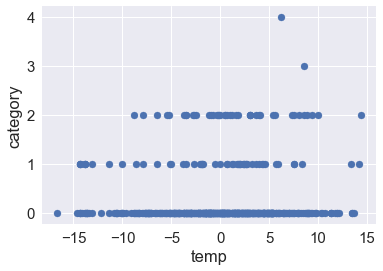

In [19]:
plt.scatter(fire.temp, fire.category)
plt.xlabel('temp')
plt.ylabel('category')

In [20]:
# fit a linear regression model and store the predictions
feature_cols = ['temp']
X = fire[feature_cols]
y = fire.category
linreg.fit(X, y)
fire['category_pred'] = linreg.predict(X)

- Lets draw a Regression Line like before

Text(0,0.5,'category_pred')

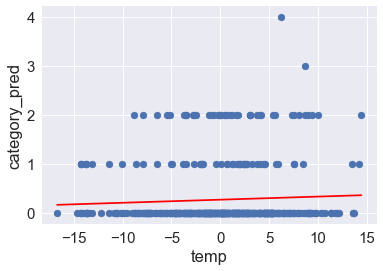

In [21]:
# scatter plot that includes the regression line
plt.scatter(fire.temp, fire.category)
plt.plot(fire.temp, fire.category_pred,color='red')
plt.xlabel('temp')
plt.ylabel('category_pred')

### Calculating the cut off value 
- When temp=0, the Regression Line crosses the midpoint between the predicting classes - temp and category_pred. Hence, when the category_pred > 0.4, then we predict it as 1 else we predict it as 0.

In [22]:
import numpy as np

# transform category_pred_class to 1 or 0
fire['category_pred_class'] = np.where(fire.category > 0.4, 1, 0)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category,area_pred,category_pred,category_pred_class
280,3,4,11,5,-5.944681,-84.17234,-195.340039,-4.921663,-16.689168,14.711799,0.882398,-0.021663,-3.577292,0,-17.901263,0.167758,0
282,5,1,1,0,-5.744681,-83.37234,-194.440039,-5.621663,-14.689168,6.711799,-0.017602,-0.021663,-12.847292,0,-15.756008,0.180337,0
279,3,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,-3.077292,0,-15.326957,0.182853,0
278,3,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,9.182708,1,-15.326957,0.182853,1
277,2,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,-2.117292,1,-15.326957,0.182853,1


Text(0,0.5,'category')

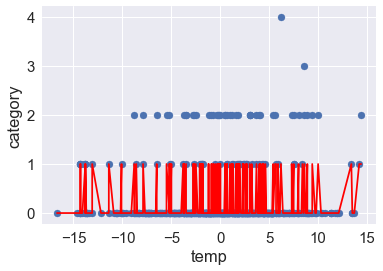

In [23]:
# plot the class predictions
plt.scatter(fire.temp, fire.category)
plt.plot(fire.temp, fire.category_pred_class, color='red')
plt.xlabel('temp')
plt.ylabel('category')

### Using Logistic Regression Instead

In [24]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['temp']
X = fire[feature_cols]
y = fire.category
logreg.fit(X, y)
fire['category_pred_class'] = logreg.predict(X)

Text(0,0.5,'category')

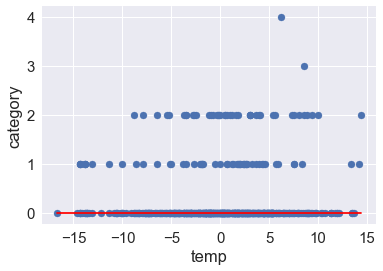

In [25]:
# plot the class predictions
plt.scatter(fire.temp, fire.category)
plt.plot(fire.temp, fire.category_pred_class, color='red')
plt.xlabel('temp')
plt.ylabel('category')

- What if we wanted the predicted probabilities instead of just the class predictions, 
to understand how confident we are in a given prediction

In [26]:
# store the predicted probabilites of class
fire['category_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0,0.5,'category')

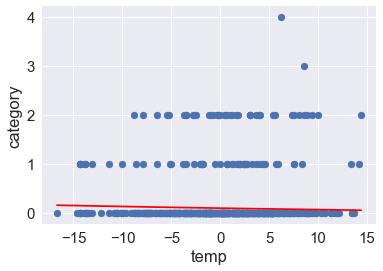

In [27]:
# plot the predicted probabilities
plt.scatter(fire.temp, fire.category)
plt.plot(fire.temp, fire.category_pred_prob, color='red')
plt.xlabel('temp')
plt.ylabel('category')

- We are dividing the "area" into 5 categories and using Logistic Regression, we are predicting the probability of fire in a given area for 'X' value of temperature.

In [28]:
# examine some example predictions
logreg.predict_proba(13.1)

array([[0.76525312, 0.06179271, 0.1279477 , 0.02924333, 0.01576313]])

In [29]:
logreg.predict_proba(21.9)

array([[0.52755207, 0.03217008, 0.12647117, 0.24458929, 0.06921739]])

In [30]:
logreg.predict_proba(18.8)

array([[0.63875786, 0.04302349, 0.13523398, 0.13845191, 0.04453275]])

### Apply Sigmoid function to classify

In [31]:
import math

def sigmoid(X):
    return 1 / (1 + math.e ** -X)

In [32]:
y = sigmoid(X)

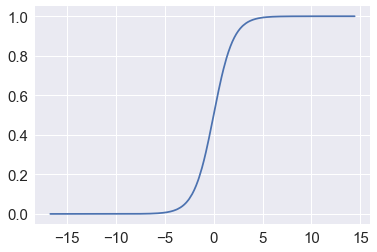

In [33]:
plt.plot(X,y)
plt.show()

In [34]:
X = fire.iloc[:, 5].values 
Y = fire.iloc[:, 13].values

In [35]:
import numpy

mean_x=numpy.mean(X)
mean_y=numpy.mean(Y)
n=len(X)
number=0
denom=0
for i in range(n):
    number+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=number/denom
b0=mean_y-(b1*mean_x)

0.0005169594118355848 0.27272727272727276
181.427659574468 -110.772340425532


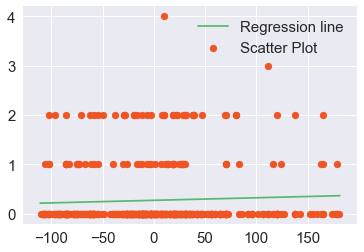

In [36]:
#printing slope and coefficient
print(b1,b0)
max_x=np.max(X)+1
min_x=np.min(X)-1
print(max_x,min_x)
x=np.linspace(min_x,max_x,100)
y=b0+b1*x

#plotting the linear regression line and the actual data points
plt.plot(x,y,color='#58b970',label='Regression line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.legend()
plt.show()

- If the values are near 0.5, for a given temperature there is 50 percent probability that a fire would happen.

In [37]:
sigmoid(0.0005169594118355848)

0.5001292398500806